In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# 1.Read Data File

In [7]:
dataframe = pd.read_csv("Data File/final_model_data.csv")
dataframe = dataframe.rename(columns={'mandeath':'target'})
dataframe = dataframe.drop('Unnamed: 0',axis=1)
dataframe = dataframe.drop('index',axis=1)
y = dataframe['target']
X=dataframe.drop('target',axis=1)
X=X.drop('IX',axis=1)
X=X.drop('X',axis=1)
X=X.drop('XIX',axis=1)
X=X.drop('XX',axis=1)
#X=dataframe.drop(labels=['IX','X','XIX','XX'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

# 2. Split Data File

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 3. Training

## 3.1 Decision Tree


In [9]:
DecisionTree = tree.DecisionTreeClassifier()
DecisionTree = DecisionTree.fit(X_train, y_train)
y_pred = DecisionTree.predict(X_test)
DecisionTree.score(X_test, y_test, sample_weight=None)

0.8613699525911395

Text(47.24999999999999, 0.5, 'Actual Value')

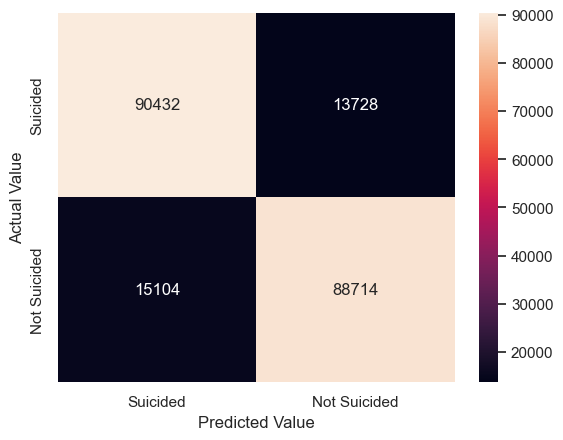

In [10]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

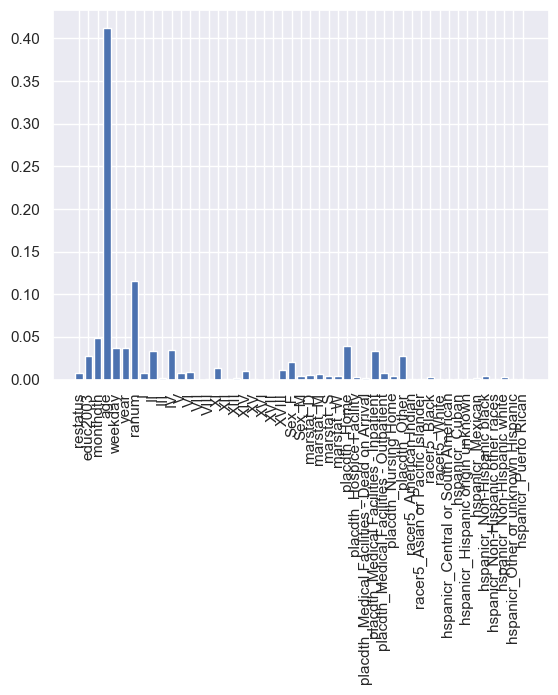

In [11]:
vector = np.vectorize(np.float_)
feature_names = X_train.columns.tolist()
importance = DecisionTree.feature_importances_
plt.bar([x for x in feature_names], importance)
plt.xticks(rotation=90)
plt.show()

## 3.2 Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)


# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test, sample_weight=None)

/Users/tingxu/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8479166065641558

Text(47.24999999999999, 0.5, 'Actual Value')

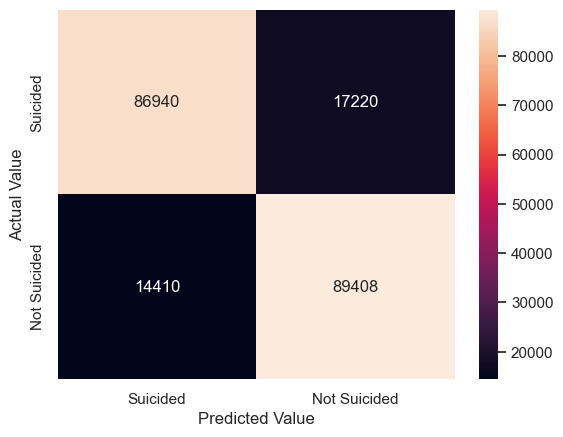

In [13]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

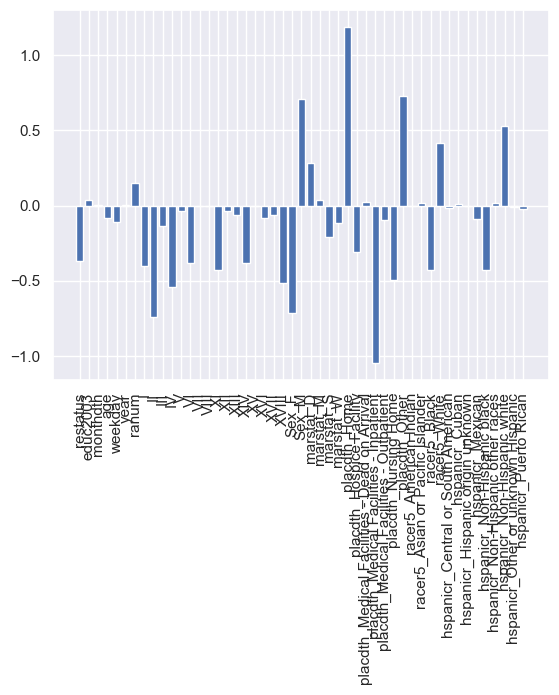

In [14]:
vector = np.vectorize(np.float_)
feature_names = X_train.columns.tolist()
importance = logreg.coef_[0]
importance = vector(importance)
plt.bar([x for x in feature_names], importance)
plt.xticks(rotation=90)
plt.show()

## 3.3 KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.8328332804431238

Text(47.24999999999999, 0.5, 'Actual Value')

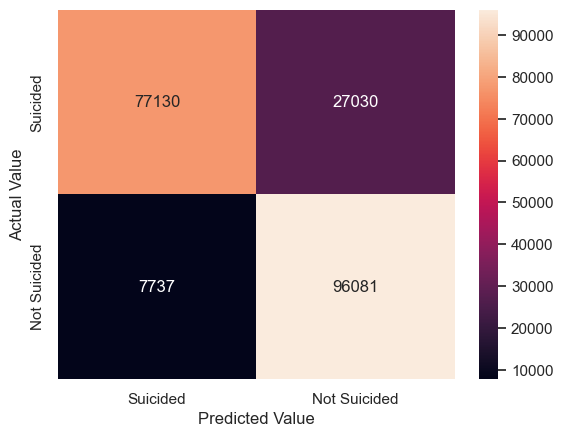

In [16]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

vector = np.vectorize(np.float_)
feature_names = X_train.columns.tolist()
importance = knn.get_params()
#plt.bar([x for x in feature_names], importance)
#plt.xticks(rotation=90)
#plt.show()
importance

## 3.4 SVC

In [17]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.8885362874919462

Text(47.24999999999999, 0.5, 'Actual Value')

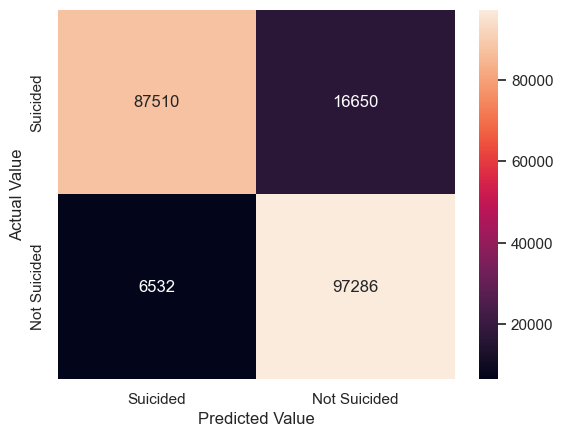

In [18]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

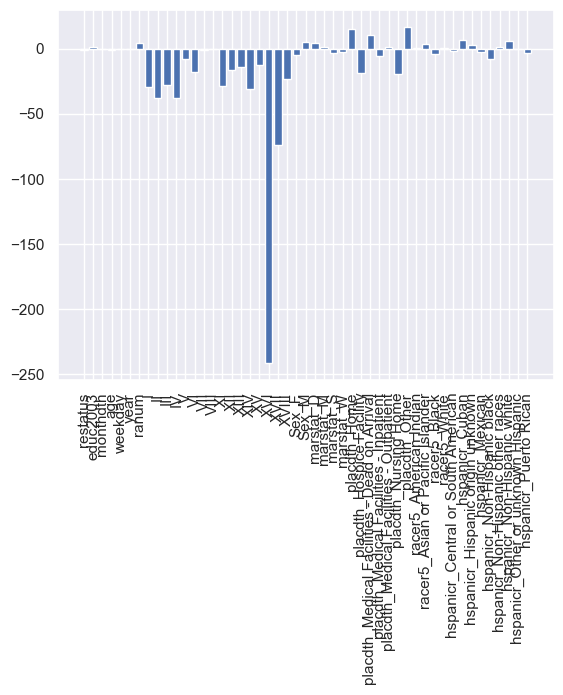

In [19]:
vector = np.vectorize(np.float_)
feature_names = X_train.columns.tolist()
importance = clf.coef_[0]
importance = vector(importance)
plt.bar([x for x in feature_names], importance)
plt.xticks(rotation=90)
plt.show()

## 3.5 Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB
muNB = MultinomialNB()
muNB.fit(X_train, y_train)
y_pred = muNB.predict(X_test)
muNB.score(X_test, y_test)

0.8278567925453654

Text(47.24999999999999, 0.5, 'Actual Value')

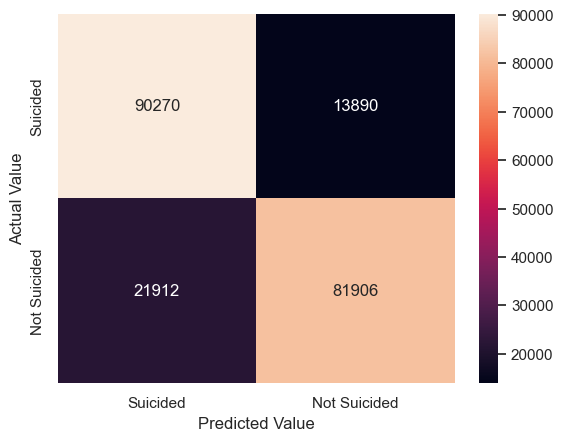

In [21]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

## 3.6 ComplementNB

In [22]:
from sklearn.naive_bayes import ComplementNB
cmNB = ComplementNB()
cmNB.fit(X_train, y_train)
y_pred = cmNB.predict(X_test)
cmNB.score(X_test, y_test)

0.8278567925453654

Text(47.24999999999999, 0.5, 'Actual Value')

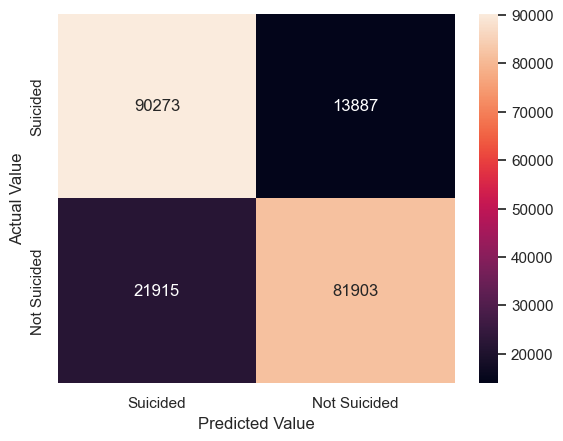

In [23]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

# cross-validation

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

Decision Tree cross-validation model

In [25]:
clf = DecisionTreeClassifier()
k_folds = KFold(n_splits = 10)
scores = cross_val_score(clf, X_train, y_train, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.85951783 0.85906787 0.86394638 0.85729172 0.85939942 0.85958888
 0.85956187 0.86107756 0.86181172 0.85809355]
Average CV Score:  0.8599356807291739
Number of CV Scores used in Average:  10


Logistic Regression cross-validation model

In [26]:
logreg = LogisticRegression(random_state=16)
k_folds = KFold(n_splits = 10)
scores = cross_val_score(logreg, X_train, y_train, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

/Users/tingxu/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tingxu/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Cross Validation Scores:  [0.84651636 0.84725051 0.87187988 0.84414816 0.84632691 0.86875385
 0.84438129 0.86837182 0.84549438 0.85423327]
Average CV Score:  0.8537356426863966
Number of CV Scores used in Average:  10


/Users/tingxu/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC cross-validation model

In [27]:
clf = SVC(kernel='linear') 
k_folds = KFold(n_splits = 10)
scores = cross_val_score(clf, X_train, y_train, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

hyperparameter tuning

In [ ]:
LogisticRegressionCV = LogisticRegression()
param_grid_mlp = {
    'penalty': ['l2','l1', 'elasticnet' ], 
    'solver' : ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga' ],
    'multi_class':['auto', 'ovr', 'multinomial'],
    'max_iter' : [100]
}

CV_mlp = GridSearchCV(estimator=LogisticRegressionCV, param_grid=param_grid_mlp, cv= 10,n_jobs=-1)
CV_mlp.fit(X_train, y_train)